In [95]:
import os
import pickle
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

base_dir = os.path.join(os.path.expanduser('~'),'Documents','Data','MotorNet')
data_dir = os.path.join(base_dir,'Sim_all')

model_name = 'model00'

all_hidden = []
x = []

time = 18


phase = ['NF1','FF1','NF2','FF2']

for i,p in enumerate(phase):
    fname = "{}_{}_saved_batch.pkl".format(model_name,p)
    saved_batch = pickle.load(open(os.path.join(data_dir,fname),'rb'))

    x.append(np.arange(len(saved_batch)))
    if i>0:
        x[i] += x[i-1][-1]+1

    for batch in saved_batch:
        fname = "{}_{}_{}_data.pkl".format(model_name,p,batch)
        data = pickle.load(open(os.path.join(data_dir,fname),'rb'))
        all_hidden.append(np.array(data['all_hidden']).transpose(0,2,1).reshape(-1,1,100)) # all_hidden
all_hidden = np.concatenate(all_hidden,axis=1)

dist = np.flipud(squareform(pdist(all_hidden[:,:,time].T)))


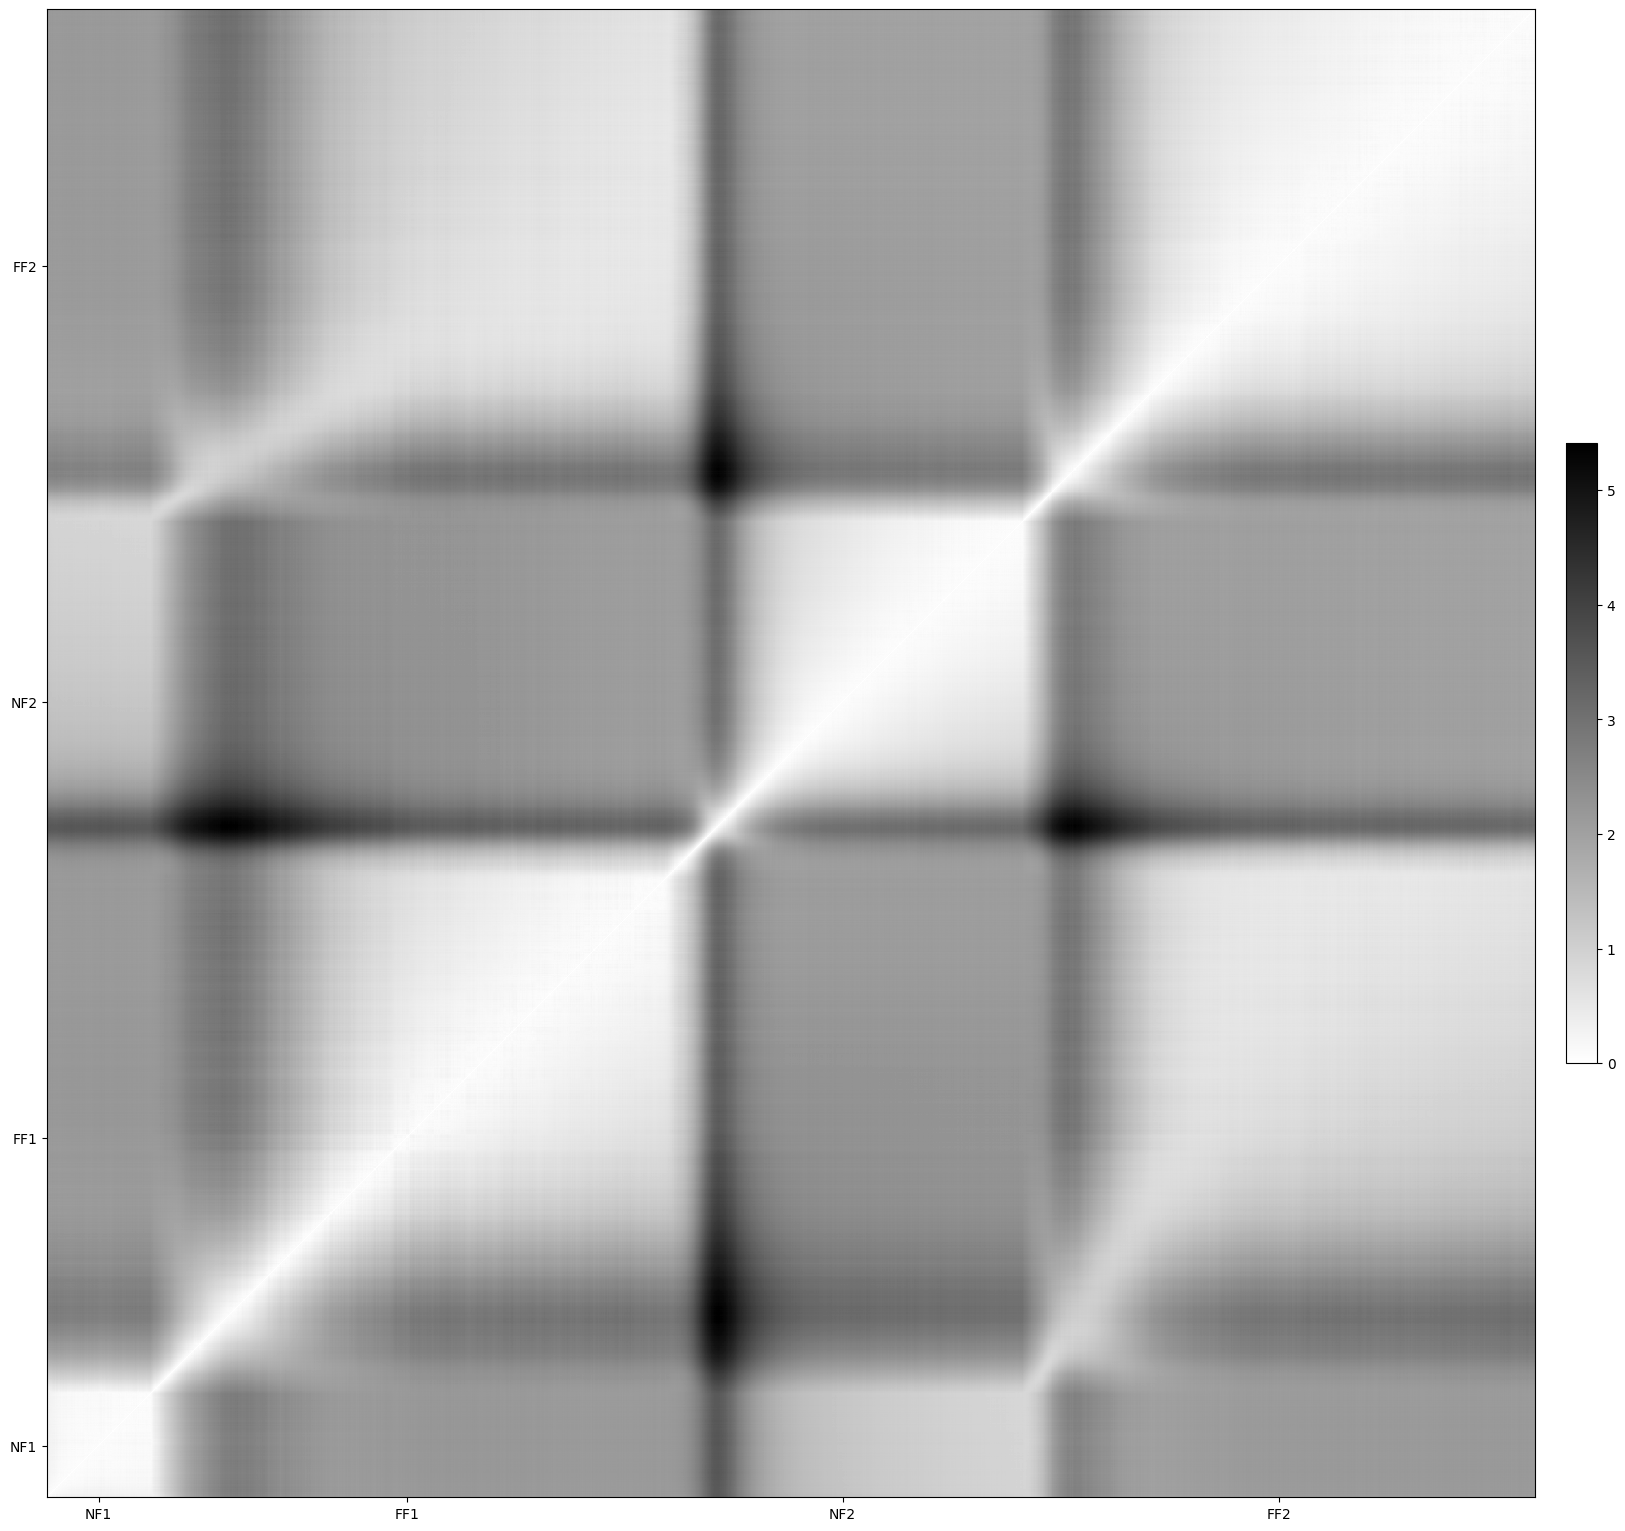

In [97]:
cent = []
max_x = 0
for i in range(len(x)):
    cent.append(round(np.mean(x[i])))
    max_x = max(max_x,x[i][-1])

figsize = (20,20)
plt.figure(figsize=figsize)
plt.imshow(dist,cmap='gray_r',interpolation='none')
plt.gcf().colorbar(plt.gci(),fraction=0.02, pad=0.02)
plt.xticks(cent,phase)
plt.yticks(max_x-cent,phase)
#plt.show()
plt.savefig(os.path.join(data_dir,f'{model_name}_learning.pdf'),dpi=300)

#fig.savefig(os.path.join(data_dir,f'{model_name}_learning.pdf'),dpi=300)